<a href="https://colab.research.google.com/github/nv-hiep/R/blob/main/Social_Security_Disability_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Wrangling in R

Water QualitySocial Security Disability

https://colab.research.google.com/notebook#create=true&language=r

# Load library

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(stringr)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Read data

In [3]:
# Read in the dataset
ssa_tib <- read_csv('http://594442.youcanlearnit.net/ssadisability.csv')
glimpse(ssa_tib)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_number(),
  Fiscal_Year = col_character()
)
ℹ Use `spec()` for the full column specifications.




Rows: 10
Columns: 25
$ Fiscal_Year     <chr> "FY08", "FY09", "FY10", "FY11", "FY12", "FY13", "FY14"…
$ Oct_Total       <dbl> 176407, 244781, 286598, 299033, 227456, 224624, 206471…
$ Oct_Internet    <dbl> 15082, 32578, 65533, 92856, 86811, 92542, 98400, 13374…
$ Nov_Total       <dbl> 204287, 181161, 213297, 209553, 200140, 249910, 237621…
$ Nov_Internet    <dbl> 17301, 25620, 50098, 63424, 71175, 107053, 117934, 967…
$ Dec_Total       <dbl> 151687, 176107, 198733, 215239, 254766, 188183, 175607…
$ Dec_Internet    <dbl> 14321, 27174, 44512, 62877, 91424, 79719, 83377, 89619…
$ Jan_Total       <dbl> 162966, 249062, 265665, 264286, 221146, 199588, 240969…
$ Jan_Internet    <dbl> 18391, 57908, 68843, 84944, 85848, 93703, 125320, 1294…
$ Feb_Total       <dbl> 228623, 221368, 225319, 223625, 228519, 219604, 205737…
$ Feb_Internet    <dbl> 26034, 50408, 58465, 71314, 83576, 101878, 108384, 101…
$ Mar_Total       <dbl> 190716, 235360, 243266, 246630, 299267, 285923, 219696…
$ Mar_Internet    <

In [4]:
head(ssa_tib)

Fiscal_Year,Oct_Total,Oct_Internet,Nov_Total,Nov_Internet,Dec_Total,Dec_Internet,Jan_Total,Jan_Internet,Feb_Total,⋯,May_Total,May_Internet,June_Total,June_Internet,July_Total,July_Internet,August_Total,August_Internet,Sept_Internet,Sept_Total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FY08,176407,15082,204287,17301,151687,14321,162966,18391,228623,⋯,226549,26337,193094,22551,181552,22728,245429,30580,24141,186750
FY09,244781,32578,181161,25620,176107,27174,249062,57908,221368,⋯,281343,65822,237329,54285,285172,66565,240611,54915,52687,228692
FY10,286598,65533,213297,50098,198733,44512,265665,68843,225319,⋯,239409,65780,231964,67163,300442,92957,248284,75535,73403,238965
FY11,299033,92856,209553,63424,215239,62877,264286,84944,223625,⋯,241673,77603,233351,79925,292949,105276,237555,86514,103564,280913
FY12,227456,86811,200140,71175,254766,91424,221146,85848,228519,⋯,239503,93826,284136,113613,221745,91323,298458,119795,93375,230648
FY13,224624,92542,249910,107053,188183,79719,199588,93703,219604,⋯,269955,123440,223238,104146,204072,98326,281828,135423,104270,214004


In [5]:
summary(ssa_tib)

 Fiscal_Year          Oct_Total       Oct_Internet      Nov_Total     
 Length:10          Min.   :173396   Min.   : 15082   Min.   :161320  
 Class :character   1st Qu.:211009   1st Qu.: 70852   1st Qu.:179313  
 Mode  :character   Median :236028   Median : 91434   Median :202214  
                    Mean   :233766   Mean   : 83384   Mean   :201009  
                    3rd Qu.:251916   3rd Qu.: 97014   3rd Qu.:212361  
                    Max.   :299033   Max.   :133740   Max.   :249910  
                                                                      
  Nov_Internet      Dec_Total       Dec_Internet      Jan_Total     
 Min.   : 17301   Min.   :151687   Min.   : 14321   Min.   :162966  
 1st Qu.: 53430   1st Qu.:172671   1st Qu.: 49103   1st Qu.:204533  
 Median : 78400   Median :182145   Median : 81548   Median :227587  
 Mean   : 72515   Mean   :190244   Mean   : 68204   Mean   :223128  
 3rd Qu.: 95088   3rd Qu.:200070   3rd Qu.: 88501   3rd Qu.:247039  
 Max.   :117934   

In [6]:
cat('Number of columns:', length(colnames(ssa_tib)), '\n' )
print( paste('Number of columns:', length(colnames(ssa_tib))) )
colnames(ssa_tib)

Number of columns: 25 
[1] "Number of columns: 25"


[1] "Fiscal_Year"     "Oct_Total"       "Oct_Internet"    "Nov_Total"      
 [5] "Nov_Internet"    "Dec_Total"       "Dec_Internet"    "Jan_Total"      
 [9] "Jan_Internet"    "Feb_Total"       "Feb_Internet"    "Mar_Total"      
[13] "Mar_Internet"    "Apr_Total"       "Apr_Internet"    "May_Total"      
[17] "May_Internet"    "June_Total"      "June_Internet"   "July_Total"     
[21] "July_Internet"   "August_Total"    "August_Internet" "Sept_Internet"  
[25] "Sept_Total"

In [7]:
cat('Number of (row and columns):', dim(ssa_tib) )

Number of (row and columns): 10 25

# Data Cleaning / Data Wrangling

Convert from wide to long

In [8]:
glimpse(ssa_tib)

Rows: 10
Columns: 25
$ Fiscal_Year     <chr> "FY08", "FY09", "FY10", "FY11", "FY12", "FY13", "FY14"…
$ Oct_Total       <dbl> 176407, 244781, 286598, 299033, 227456, 224624, 206471…
$ Oct_Internet    <dbl> 15082, 32578, 65533, 92856, 86811, 92542, 98400, 13374…
$ Nov_Total       <dbl> 204287, 181161, 213297, 209553, 200140, 249910, 237621…
$ Nov_Internet    <dbl> 17301, 25620, 50098, 63424, 71175, 107053, 117934, 967…
$ Dec_Total       <dbl> 151687, 176107, 198733, 215239, 254766, 188183, 175607…
$ Dec_Internet    <dbl> 14321, 27174, 44512, 62877, 91424, 79719, 83377, 89619…
$ Jan_Total       <dbl> 162966, 249062, 265665, 264286, 221146, 199588, 240969…
$ Jan_Internet    <dbl> 18391, 57908, 68843, 84944, 85848, 93703, 125320, 1294…
$ Feb_Total       <dbl> 228623, 221368, 225319, 223625, 228519, 219604, 205737…
$ Feb_Internet    <dbl> 26034, 50408, 58465, 71314, 83576, 101878, 108384, 101…
$ Mar_Total       <dbl> 190716, 235360, 243266, 246630, 299267, 285923, 219696…
$ Mar_Internet    <

In [30]:
ssa_tib.long <- gather(ssa_tib, month, applications, -Fiscal_Year)
head(ssa_tib.long, 5)

Fiscal_Year,month,applications
<chr>,<chr>,<dbl>
FY08,Oct_Total,176407
FY09,Oct_Total,244781
FY10,Oct_Total,286598
FY11,Oct_Total,299033
FY12,Oct_Total,227456


In [31]:
unique(ssa_tib.long$month)

[1] "Oct_Total"       "Oct_Internet"    "Nov_Total"       "Nov_Internet"   
 [5] "Dec_Total"       "Dec_Internet"    "Jan_Total"       "Jan_Internet"   
 [9] "Feb_Total"       "Feb_Internet"    "Mar_Total"       "Mar_Internet"   
[13] "Apr_Total"       "Apr_Internet"    "May_Total"       "May_Internet"   
[17] "June_Total"      "June_Internet"   "July_Total"      "July_Internet"  
[21] "August_Total"    "August_Internet" "Sept_Internet"   "Sept_Total"

In [32]:
# Separate a column
ssa_tib.long <- separate(ssa_tib.long, month, c("month", "method"), sep = "_")
head(ssa_tib.long)

Fiscal_Year,month,method,applications
<chr>,<chr>,<chr>,<dbl>
FY08,Oct,Total,176407
FY09,Oct,Total,244781
FY10,Oct,Total,286598
FY11,Oct,Total,299033
FY12,Oct,Total,227456
FY13,Oct,Total,224624


In [33]:
unique(ssa_tib.long$month)

[1] "Oct"    "Nov"    "Dec"    "Jan"    "Feb"    "Mar"    "Apr"    "May"   
 [9] "June"   "July"   "August" "Sept"

In [34]:
# Trim month string to 03 characters
ssa_tib.long$month <- substr(ssa_tib.long$month, 1, 3)

In [35]:
unique(ssa_tib.long$month)

[1] "Oct" "Nov" "Dec" "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep"

In [36]:
unique(ssa_tib.long$Fiscal_Year)

[1] "FY08" "FY09" "FY10" "FY11" "FY12" "FY13" "FY14" "FY15" "FY16" "FY17"

In [37]:
# To real year
ssa_tib.long$Fiscal_Year <- str_replace(ssa_tib.long$Fiscal_Year, "FY", "20")

In [38]:
unique(ssa_tib.long$Fiscal_Year)

[1] "2008" "2009" "2010" "2011" "2012" "2013" "2014" "2015" "2016" "2017"

In [46]:
ssa_tib.long$Date <- dmy(paste("01", ssa_tib.long$month, ssa_tib.long$Fiscal_Year))

In [47]:
summary(ssa_tib.long)

 Fiscal_Year           month              method           applications   
 Length:240         Length:240         Length:240         Min.   : 14321  
 Class :character   Class :character   Class :character   1st Qu.: 91399  
 Mode  :character   Mode  :character   Mode  :character   Median :145344  
                                                          Mean   :154322  
                                                          3rd Qu.:224669  
                                                          Max.   :300442  
                                                          NA's   :16      
      Date           
 Min.   :2008-01-01  
 1st Qu.:2010-06-23  
 Median :2012-12-16  
 Mean   :2012-12-15  
 3rd Qu.:2015-06-08  
 Max.   :2017-12-01  
                     

In [48]:
head(ssa_tib.long)

Fiscal_Year,month,method,applications,Date
<chr>,<chr>,<chr>,<dbl>,<date>
2008,Oct,Total,176407,2008-10-01
2009,Oct,Total,244781,2009-10-01
2010,Oct,Total,286598,2010-10-01
2011,Oct,Total,299033,2011-10-01
2012,Oct,Total,227456,2012-10-01
2013,Oct,Total,224624,2013-10-01


In [50]:
# Account for the difference between Calendar Year and Fiscal Year
advanced_date_id <- which( month(ssa_tib.long$Date) >= 10 )
advanced_date_id

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60

In [56]:
# To calendar year
year(ssa_tib.long$Date[advanced_date_id]) <- year( ssa_tib.long$Date[advanced_date_id] ) - 1

In [57]:
head(ssa_tib.long)

Fiscal_Year,month,method,applications,Date
<chr>,<chr>,<chr>,<dbl>,<date>
2008,Oct,Total,176407,2007-10-01
2009,Oct,Total,244781,2008-10-01
2010,Oct,Total,286598,2009-10-01
2011,Oct,Total,299033,2010-10-01
2012,Oct,Total,227456,2011-10-01
2013,Oct,Total,224624,2012-10-01


In [58]:
# Remove redundant columns
ssa_tib.long$Fiscal_Year <- NULL
ssa_tib.long$month <- NULL

In [59]:
head(ssa_tib.long)

method,applications,Date
<chr>,<dbl>,<date>
Total,176407,2007-10-01
Total,244781,2008-10-01
Total,286598,2009-10-01
Total,299033,2010-10-01
Total,227456,2011-10-01
Total,224624,2012-10-01


In [60]:
# Convert method to factor
ssa_tib.long$method <- as.factor(ssa_tib.long$method)

In [62]:
summary(ssa_tib.long)

      method     applications         Date           
 Internet:120   Min.   : 14321   Min.   :2007-10-01  
 Total   :120   1st Qu.: 91399   1st Qu.:2010-03-24  
                Median :145344   Median :2012-09-16  
                Mean   :154322   Mean   :2012-09-15  
                3rd Qu.:224669   3rd Qu.:2015-03-08  
                Max.   :300442   Max.   :2017-09-01  
                NA's   :16                           

In [64]:
ssa <- ssa_tib.long %>% spread(method, applications)
head(ssa)

Date,Internet,Total
<date>,<dbl>,<dbl>
2007-10-01,15082,176407
2007-11-01,17301,204287
2007-12-01,14321,151687
2008-01-01,18391,162966
2008-02-01,26034,228623
2008-03-01,21064,190716


# Vizualization

Question: Have the effort by Social Security Disability to move applications online been successful?

Internet application = online application

In [69]:
ssa$online_percentage <- round(100*ssa$Internet / ssa$Total, 3)

In [70]:
print(ssa, n=5)

# A tibble: 120 x 4
  Date       Internet  Total online_percentage
  <date>        <dbl>  <dbl>             <dbl>
1 2007-10-01    15082 176407              8.55
2 2007-11-01    17301 204287              8.47
3 2007-12-01    14321 151687              9.44
4 2008-01-01    18391 162966             11.3 
5 2008-02-01    26034 228623             11.4 
# … with 115 more rows


Warning message:
“Removed 8 rows containing missing values (geom_point).”


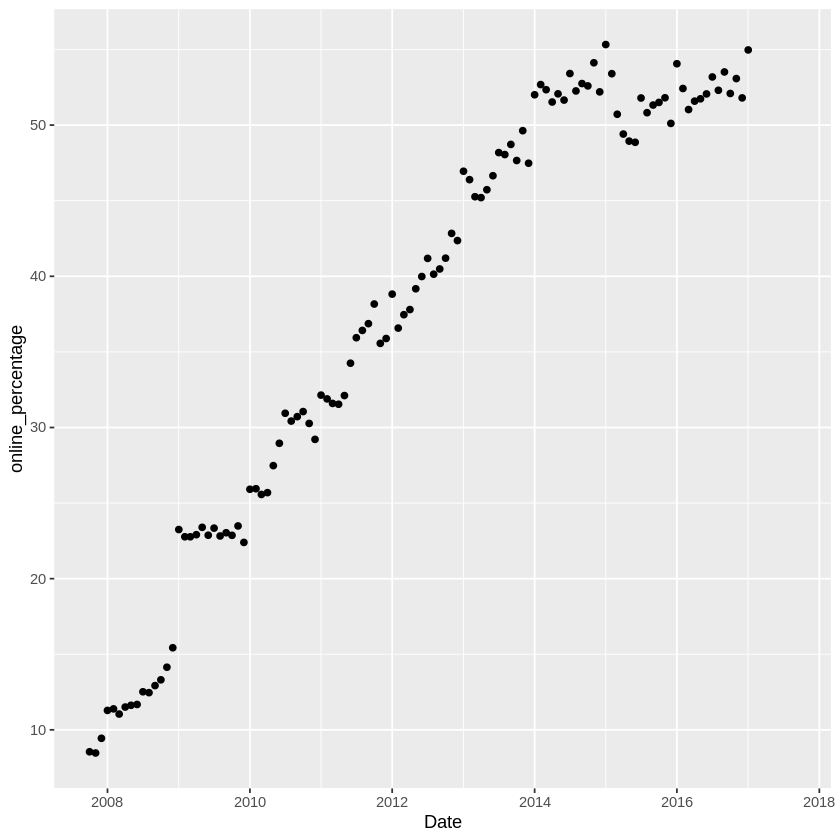

In [71]:
ggplot(data = ssa, mapping = aes(x=Date, y = online_percentage)) +
geom_point()

# Conclusion

The effort by the Social Security Administration move applications online were successful for many years. Specifically, only less than 10% of applications in 2007 were submitted online and that number grew steadily until 2014, when it exceeded 50%, but then it leveled off. So they might have some more work to do if they want to continue to increase that number. 